# Evolution of Einstein's equations

# Initial data , setting length of the domain and discretization


# Parameters

In [133]:
m=4
run = 1

1

Choose your grid

In [134]:
global compactified=true
global loggrid=false
global bisection=false
global zeroformat=false
global twod=false

global source=false

false

In [135]:
function compactify(r)
    x=r/(1+r)
    return x
end

compactify (generic function with 1 method)

In [136]:
using Quadmath, Printf

res=m;
N=2.0^m*200.0/2.0

if compactified==true
    Xf=1.0
else
    Xf=2.0
end

dx=Xf/N
if loggrid==false
    dt=0.5*round(dx,digits=10)
else
    dt=0.1*round(dx,digits=10)
end
Nt=N
Tf=Nt*dt;

In [137]:
print(N)

1600.0

In [138]:
global dir = "/home/rita13santos/Desktop/MSc Thesis/Git/TMYangMills/DATA"

"/home/rita13santos/Desktop/MSc Thesis/Git/TMYangMills/DATA"

# Grid

In [139]:
using Printf
include("./TMYangMillsTHREE.jl");

In [140]:
ori=0.0#Float128(0.0)#0.0;
initX1 = nothing
N=int(N)
initX1=range(ori, stop=Xf, step=dx);
initX = range(round(ori-3.0*dx,digits=10), stop=Xf+3.0*dx, step=dx)

L=length(initX);
println("step size is  ", dx)
println("the time step is ", dt)

if loggrid==true
    global originalX=initX
    xtilde=gridfunc(initX1)
    initX1=xtilde
    initX=collect(initX)
    initX[4:L-3]=xtilde
end;

step size is  0.000625
the time step is 0.0003125


# Initial data of m β Ψ and Ψ,x

In [141]:
using Dierckx


####

initm=zeros(L)
initbeta=zeros(L)
initxi=zeros(L)
initderxi=zeros(L)

state_array=[initm initbeta initxi initderxi];

#WBAR,R
#0.088125<A*<0.08875
A=0.011#0.08865958683658391#0.0884375
r0=0.33
sigma=0.075

initderxi[4:L-3] = init_derpsi(initX1,r0,sigma,A)

state_array[:,4] = initderxi
state_array=ghost(state_array)

####
#XI FROM XI,X

derxi_func = Spline1D(initX[4:L-3], state_array[4:L-3,4],  k=4);

funcs=[derxi_func];

In [142]:
(0.088125+0.08875)/2
there were runs with 0.6 as critical stop that were marked as critical but didnt crash

LoadError: syntax: extra token "were" after end of expression

In [143]:
y0=[0.0 0.0 0.0]

if twod==true
        state_array[4:L-3,1:3] = twod_n_rk4wrapper(RHS,y0,initX[4:L-3],0,funcs,state_array[:,:]);
    else
        state_array[4:L-3,1:3] = n_rk4wrapper(RHS,y0,initX[4:L-3],0,funcs,state_array[:,:]);
end

#state_array = ghost(state_array);

1601×3 Matrix{Float64}:
 0.0          0.0          0.0
 4.09266e-23  4.10013e-20  2.89362e-14
 9.96059e-23  6.54445e-20  6.23103e-14
 1.71143e-22  8.43641e-20  1.00628e-13
 2.58388e-22  1.01931e-19  1.44446e-13
 3.64803e-22  1.19617e-19  1.94376e-13
 4.94594e-22  1.38241e-19  2.5109e-13
 6.52864e-22  1.58417e-19  3.15326e-13
 8.45795e-22  1.8069e-19   3.87896e-13
 1.08088e-21  2.05607e-19  4.69688e-13
 1.36717e-21  2.33754e-19  5.61676e-13
 1.71561e-21  2.6578e-19   6.64931e-13
 2.13941e-21  3.02421e-19  7.80622e-13
 ⋮                         
 0.00313627   0.00882403   2.59975e-18
 0.00313627   0.00882403   2.59975e-18
 0.00313627   0.00882403   2.59975e-18
 0.00313627   0.00882403   2.59975e-18
 0.00313627   0.00882403   2.59975e-18
 0.00313627   0.00882403   2.59975e-18
 0.00313627   0.00882403   2.59975e-18
 0.00313627   0.00882403   2.59975e-18
 0.00313627   0.00882403   2.59975e-18
 0.00313627   0.00882403   2.59975e-18
 0.00313627   0.00882403   2.59975e-18
 0.00313627   0.00882

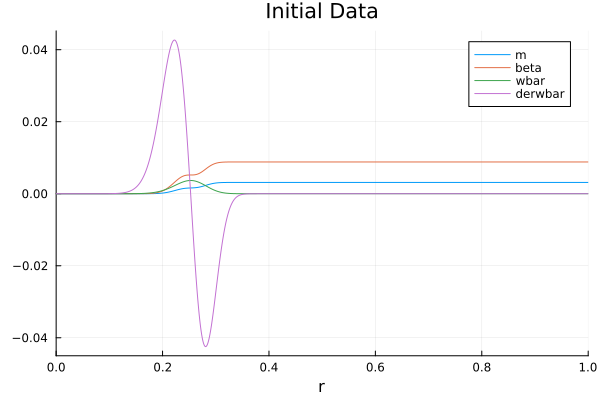

In [144]:
using Plots #showing initial data and the initial status of the horizon finder
plot((initX[4:L-3]), state_array[4:L-3,1:4], xaxis="r",title="Initial Data", labels=["m" "beta" "wbar" "derwbar"],xlim=[0,1])

In [145]:
function compactify(r)
    return r/(1+r)
end
function uncompactify(x)
    return x/(1-x)
end;

# Defining the initial state array for the evolution m β Ψ and Ψ,x

In [146]:
using CSV, Tables
#CSV.write(dir*"/res$res/time_step0.csv", Tables.table(state_array), writeheader=false)

global files=["m", "beta", "xi", "derxi", "derderxi"]

derderxi=Der_arrayLOP(state_array,4,initX) .* (initX .- 1) .^ 2
print_muninn(files, 0, [state_array[:,1:4] derderxi],res,"w", initX)

In [147]:
time=0.0
criticality=0.0
explode=0.0
evol_stats = [criticality A sigma r0 time explode run]
global monitor_ratio = zeros(L);
#CSV.write(dir*"/parameters.csv", Tables.table(evol_stats), writeheader=true, header=["criticality", "A", "sigma", "r0", "time", "explode", "run"])

In [148]:
ginit=speed(initX,state_array[:,1],state_array[:,2])
println(update_dt(initX,state_array[:,1],state_array[:,2],dx,ginit)/dt)

0.4005004691409304


In [149]:
using Base.Threads
Threads.nthreads()

4

In [150]:
monitor_ratio[5:L-4] = 2 .* state_array[5:L-4,1] ./ initX[5:L-4] .* (1 .- initX[5:L-4]);
maximum(monitor_ratio)

0.013903362780892242

In [151]:
dt=0.001/2^(m-1)

0.000125

 ## Time evolution

fixed grid

In [152]:
finaltime=1.
evol_stats, T_interp = timeevolution(state_array,finaltime,run);
#CSV.write(dir*"/timearray$res.csv", Tables.table(T_interp), writeheader=false);
#CSV.write(dir*"/parameters.csv", Tables.table(evol_stats), writeheader=false);



iteration 50 dt is 0.000125, t=0.006250000000000005 speed is 0.4993751953125, dx/dt=5.0


iteration 100 dt is 0.000125, t=0.01250000000000001 speed is 0.4993751953125, dx/dt=5.0


iteration 150 dt is 0.000125, t=0.018750000000000013 speed is 0.4993751953125, dx/dt=5.0


iteration 200 dt is 0.000125, t=0.02500000000000002 speed is 0.4993751953125, dx/dt=5.0


iteration 250 dt is 0.000125, t=0.03125000000000002 speed is 0.4993751953125, dx/dt=5.0


iteration 300 dt is 0.000125, t=0.037500000000000026 speed is 0.4993751953125, dx/dt=5.0


iteration 350 dt is 0.000125, t=0.04375000000000003 speed is 0.4993751953125, dx/dt=5.0


iteration 400 dt is 0.000125, t=0.05000000000000004 speed is 0.4993751953125, dx/dt=5.0


iteration 450 dt is 0.000125, t=0.05625000000000004 speed is 0.4993751953125, dx/dt=5.0


iteration 500 dt is 0.000125, t=0.06250000000000004 speed is 0.4993751953125, dx/dt=5.0


iteration 550 dt is 0.000125, t=0.06875000000000005 speed is 0.4993751953125, dx/dt=5.0


iterat



iteration 4500 dt is 0.000125, t=0.5624999999999797 speed is 0.4993751871717626, dx/dt=5.0


iteration 4550 dt is 0.000125, t=0.5687499999999818 speed is 0.49937519037768113, dx/dt=5.0


iteration 4600 dt is 0.000125, t=0.5749999999999839 speed is 0.499375192955425, dx/dt=5.0


iteration 4650 dt is 0.000125, t=0.581249999999986 speed is 0.49937519466992597, dx/dt=5.0


iteration 4700 dt is 0.000125, t=0.587499999999988 speed is 0.49937519531168684, dx/dt=5.0


iteration 4750 dt is 0.000125, t=0.5937499999999901 speed is 0.4993751947120553, dx/dt=5.0


iteration 4800 dt is 0.000125, t=0.5999999999999922 speed is 0.4993751927570485, dx/dt=5.0


iteration 4850 dt is 0.000125, t=0.6062499999999943 speed is 0.49937518939863207, dx/dt=5.0


iteration 4900 dt is 0.000125, t=0.6124999999999964 speed is 0.49937518466248754, dx/dt=5.0


iteration 4950 dt is 0.000125, t=0.6187499999999985 speed is 0.49937517865152525, dx/dt=5.0


iteration 5000 dt is 0.000125, t=0.6250000000000006 speed is 0.49